In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.svm import SVR

%matplotlib inline

In [4]:
# Read stock data
data = pd.read_csv('DMART.NS.csv')

In [9]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,1122.050049,1134.500000,1081.349976,1117.300049,1117.300049,544060
1,2018-02-06,1075.000000,1119.000000,1060.099976,1105.699951,1105.699951,706200
2,2018-02-07,1127.800049,1134.699951,1120.000000,1122.650024,1122.650024,267181
3,2018-02-08,1129.000000,1174.000000,1125.050049,1165.550049,1165.550049,493415
4,2018-02-09,1149.949951,1195.000000,1130.000000,1177.800049,1177.800049,469818
5,2018-02-12,1189.000000,1199.500000,1180.050049,1187.199951,1187.199951,241765
6,2018-02-14,1196.599976,1208.250000,1182.099976,1201.400024,1201.400024,426463
7,2018-02-15,1206.949951,1207.000000,1180.449951,1183.949951,1183.949951,269802
8,2018-02-16,1188.800049,1191.300049,1170.099976,1173.500000,1173.500000,199767
9,2018-02-19,1179.000000,1179.000000,1162.000000,1168.900024,1168.900024,224464


In [24]:
dates = data['Date'].apply(lambda e: int(e.split('-')[-1]))
rates = data['Open']
dates = dates.to_frame()

In [22]:
# defining the support vector regression models
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [26]:
# train the data
svr_lin.fit(dates, rates)
svr_poly.fit(dates, rates)
svr_rbf.fit(dates, rates)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

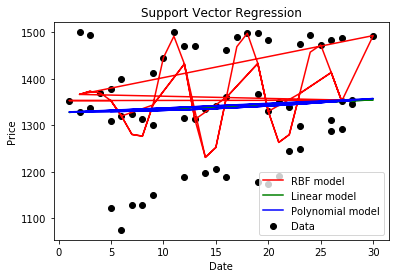

In [27]:
# plot the data with predicted values
plt.scatter(dates, rates, color= 'black', label= 'Data') # plotting the initial datapoints 
plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [34]:
# predicted price for a given date
print(svr_lin.predict(3), svr_poly.predict(3), svr_rbf.predict(3))

[ 1329.62604508] [ 1329.05970347] [ 1373.18687692]
